# Aproksymacja liniowa

***Zadanie 1.***

Zdefiniuj funkcję liniową z dowolnymi paramterami $a,b$. Przeprowadź symulację zaszumionego próbkowania jej wartości z przedziału [0,50]. Wykreśl funkcję wraz z jej zaszumionymi próbkami, a następnie dokonaj aproskymacji swojej funkcji za pomocą:
* funkcji liniowej,
* funkcji kwadratowej,
* wielomianu trzeciego stopnia.

Zastosuj metodę/metody minimalizujące najmniejszych kwadratów (normę średniokwadratową np. funkcję *curve_fit* z [SciPy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html)).

Porównaj otrzymane wyniki z metodami interpolacji poznanymi na poprzednich zajęciach. W tym celu przeprowadź interpolację wygenerowanych danych za pomocą wielomianu interpolacyjnego Lagrange'a oraz za pomocą funkcji sklejanych.

*Wskazówka*: Najpierw wygerneruj tablicę 100 wartości $(x_i, f(x_i))$ dla $x_i \in [0,50]$. Następnie za pomocą np. funkcji *np.random.normal* wygeneruj 100-elementową tablicę szumu losowego i dodaj ją do wygenerowanych **wartości** funkcji (tj. do $f(x_i)$).

In [ ]:
def lin(x: float, a: float=1, b: float=1):
    return a*x+b

In [29]:
def quad(x: float, a: float=1, b: float=1, c: float=1):
    return a*(x**2)+b*x+c

In [84]:
def cubic(x: float, a: float=1, b: float=1, c: float=1, d: float=1):
    return a*(x**3)+b*(x**2)+c*x+d

popt:  [ 0.54050267 12.10171617]
popt:  [  0.60024412  -3.58379902 -59.17217821]
popt:  [ 1.32733521e-02 -1.16728609e+00 -6.81251205e-01  5.87439874e+01]


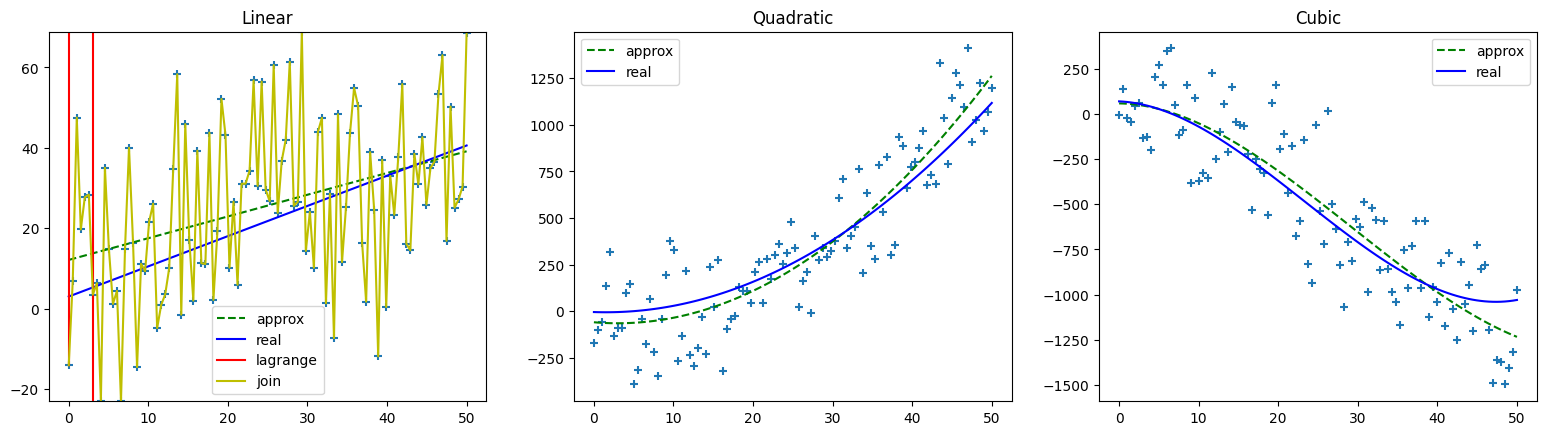

In [194]:
from random import random
from matplotlib import pyplot as plt
import numpy as np
import scipy.optimize


X = np.linspace(0, 50, 100)
plt.figure(figsize=(6.4*3, 4.8))

Y = lin(X, random()*10-5, random()*10-5)
noise_Y = Y + np.random.normal(size=100, scale=20)
popt, _ = scipy.optimize.curve_fit(lin, X, noise_Y)
L = scipy.interpolate.lagrange(X, noise_Y)
L_join = scipy.interpolate.interp1d(X, noise_Y)
print('popt: ', popt)
plt.subplot(1, 3, 1)
plt.title('Linear')
plt.scatter(X, noise_Y, marker='+')
plt.plot(X, lin(X, *popt), 'g--', label='approx')
plt.plot(X, Y, 'b', label='real')
plt.ylim((min(noise_Y), max(noise_Y)))
plt.plot(X, L(X), 'r', label='lagrange')
plt.plot(X, L_join(X), 'y', label='join')
plt.legend()

Y = quad(X, random()*4-2, random()*4-2, random()*10-5)
noise_Y = Y + np.random.normal(size=100, scale=200)
popt, _ = scipy.optimize.curve_fit(quad, X, noise_Y)
print('popt: ', popt)
plt.subplot(1, 3, 2)
plt.title('Quadratic')
plt.scatter(X, noise_Y, marker='+')
plt.plot(X, quad(X, *popt), 'g--', label='approx')
plt.plot(X, Y, 'b', label='real')
plt.legend()

Y = cubic(X, 0.02, -1.4, -2, 70)
noise_Y = Y + np.random.normal(size=100, scale=200)
popt, _ = scipy.optimize.curve_fit(cubic, X, noise_Y)
print('popt: ', popt)
plt.subplot(1, 3, 3)
plt.title('Cubic')
plt.scatter(X, noise_Y, marker='+')
plt.plot(X, cubic(X, *popt), 'g--', label='approx')
plt.plot(X, Y, 'b', label='real')
plt.legend()

plt.show()


***Zadanie 2.***


Wykorzystaj metody aproksymacji do rozwiązania zadania z kierowcą z poprzednich ćwiczeń.


Kierowca jadący z miasta A do miasta B, zauważywszy na drodze fotoradar, zaczął gwałtownie hamować. Przebieg jego położenia, zarejestrowany przez nawigację, pokazano w poniższej tabeli. Wiedząc, że radar znajduje się w punkcie o współrzędnej 79.6 m, oszacuj kiedy kierowca minął fotoradar (w tym celu skorzystaj z jednej z metod z laboratorium 3) oraz z jaką prędkością wtedy jechał (wykorzystaj relację drogi i prędkości znaną z fizyki). 

|czas \[s\]|położenie \[m\]|
|--|--|
|0.0|0.0|
|1.0|42.7|
|2.0|73.2|
|3.0|92.5|

In [221]:
from typing import Callable, Tuple, List

def bisect_method(f: Callable[[int], float], xa: float, xb: float, eps: float = 1e-10, max_iter: int = 100, prev_c: float = None, curr_iter: int = 1) -> float:
    if f(xa)*f(xb)>0:
        raise ValueError("Warunek startowy nie został spełniony")
    c = (xa+xb)/2
    if curr_iter > max_iter:
        print("ITERATION LIMIT")
        return c
    if f(c) == 0 or (prev_c and abs(c-prev_c)<=eps):
        return c
    elif (f(c) < 0 and f(xa) > 0) or (f(c) > 0 and f(xa) < 0):
        # xb <- c
        return bisect_method(f, xa, c, prev_c=c, curr_iter=curr_iter+1)
    else: # f(c) < 0
        # xa <- c
        return bisect_method(f, c, xb, prev_c=c, curr_iter=curr_iter+1)

x_0:  2.267246998177143
m(x_0):  79.60000000017203
v(x_0):  21.823210121362834


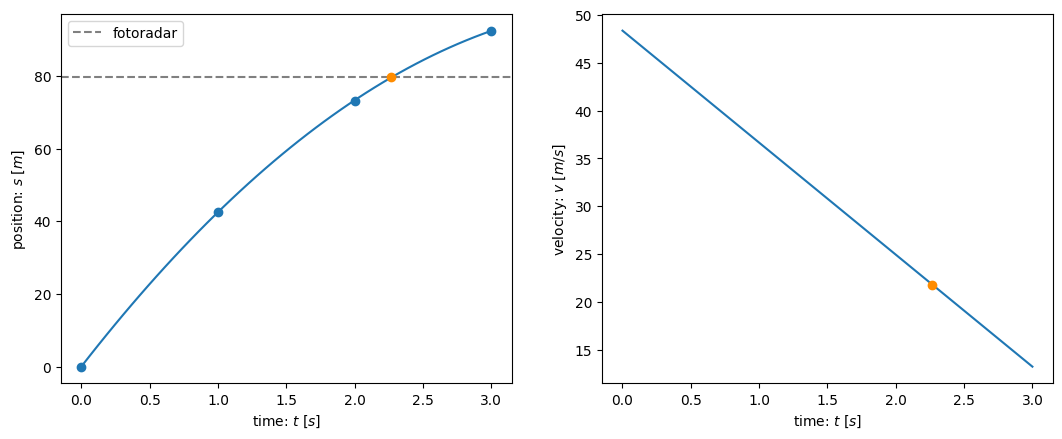

In [259]:
from scipy.interpolate import CubicSpline

FOTORADAR = 79.6

T = [0, 1, 2, 3]
S = [0, 42.7, 73.2, 92.5]

X = np.linspace(0, 3, 50)
args, _ = scipy.optimize.curve_fit(quad, T, S)
Y = quad(X, *args)

f = CubicSpline(X, Y)
derivative_f = f.derivative()
g = lambda x: quad(x,  args[0], args[1], args[2]-FOTORADAR)
x_0 = bisect_method(g, 0, 3)
print('x_0: ', x_0)
print('m(x_0): ', f(x_0))
print('v(x_0): ', derivative_f(x_0))


plt.figure(figsize=(6.4*2, 4.8))
# Position
plt.subplot(1,2,1)
plt.xlabel('time: $t$ $[s]$')
plt.ylabel('position: $s$ $[m]$')
plt.axhline(y=FOTORADAR, label='fotoradar', color='gray', linestyle='--')
plt.scatter(T, S, zorder=10)
plt.plot(X, Y)
plt.scatter(x_0, f(x_0), color='darkorange', zorder=4)
plt.legend()
# Velocity
plt.subplot(1,2,2)
plt.xlabel('time: $t$ $[s]$')
plt.ylabel('velocity: $v$ $[m/s]$')
plt.plot(X, derivative_f(X))
plt.scatter(x_0, derivative_f(x_0), color='darkorange', zorder=4)
plt.show()

# x_0:  2.2758469402906485
# m(x_0):  79.59999999966367
# v(x_0):  21.68189336931191

***Zadanie 3.***


Spróbuj przeprowadzić regresję liniową (aproksymację funkcją liniową) na rzeczywistych danych (np. z repozytorium [UCI](https://archive.ics.uci.edu/ml/datasets.php?format=&task=reg&att=&area=&numAtt=&numIns=&type=&sort=nameUp&view=table)). Wykorzystaj stworzony model do predykcji. Dla ułatwienia możesz zastosować funkcję z biblioteki [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

In [ ]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
tic_tac_toe_endgame = fetch_ucirepo(id=101) 
  
# data (as pandas dataframes) 
X = tic_tac_toe_endgame.data.features 
y = tic_tac_toe_endgame.data.targets 
  
# metadata 
print(tic_tac_toe_endgame.metadata) 
  
# variable information 
print(tic_tac_toe_endgame.variables) 

print(X)
print(y)

In [288]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd

X = pd.get_dummies(X)
y = y=='positive'

X_train, X_test, y_train, y_test = train_test_split(X, y)

reg = LinearRegression().fit(X_train, y_train)

y_predicted = reg.predict(X_test)

residuum = y_test-y_predicted

print('residuum norm:', np.linalg.norm(residuum['class']))

residuum norm: 0.0
